# Campaign for selling personal loans

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

sns.set()

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [3]:
data.head(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
data.tail(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4975,4976,38,11,29,95207,4,1.00,2,0,0,0,0,1,0
4976,4977,29,5,31,95039,1,1.80,2,0,0,0,0,1,1
4977,4978,40,15,54,90266,3,0.80,3,0,0,0,0,1,0
4978,4979,57,27,63,90210,4,2.00,3,0,0,0,0,1,0
4979,4980,50,26,92,90740,1,2.60,2,213,0,0,0,0,1
4980,4981,29,5,135,95762,3,5.30,1,0,1,0,1,1,1
4981,4982,34,9,195,90266,2,3.00,1,122,0,0,0,1,0
4982,4983,36,10,45,95126,4,0.20,1,0,0,0,0,0,1
4983,4984,51,26,72,95370,1,2.90,1,0,0,0,0,0,0
4984,4985,27,1,98,94043,4,2.30,3,0,0,0,0,0,1


In [5]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Observations:
1. ID - Unique identity column which doesn't provide any conclusion for the potential loan customers. Hence will be dropping the column.
2. Age - Quantitative data representing age of the customer.
3. Experience - Quantitative data representing years of professional experience.
4. Income - Quantitative data representing Annual income of the customer in dollars.
5. ZIP Code - Categorical data representing zip Code of the home address of customer. We need to check the significance of the column whether customer address plays an important role or not. If this is not providing any conclusion, we will be dropping the column.
6. Family - Categorical data representing the size of the family
7. CCAvg - Quantitative data representing the average spending by the credit card.
8. Education - Categorical data representing the education level of the customer. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
9. Mortage - Quatitative data representing the value of house mortgage.
10. Personal Loan - Binary data representing the customers accepted the loan offered or not. This will be the target column.
11. Securities Account - Binary data representing whether the customer is having security account with the bank or not.
12. CD Account - Binary data representing whether the customer CD account with the bank or not. 
13. Online - Binary data representing whether the customer uses internet banking or not.
14. CreditCard - Binary data representing whether the customer uses credit card or not issued by the bank.

As we can see, there are lot of 0 present in the dataset. Conclusions based on the understanding:
1. Age of a customer cannot be zero.
2. If income is 0, bank will not interested in targeting those customers.
3. Family size cannot be zero as customer itself will be of size 1.
4. Experience can be 0 as there may be customers with 0 professional experience.
5. 0 value in other column makes sense as those are categorical column representing the value in binary format.

In [6]:
data.shape

(5000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Observations:
1. There are 5000 records present in the dataset and having 14 columns.
2. 'Personal Loan' column will be the target column.
3. All columns present in the dataset are numeric type. No encoding will be required.
4. There are no missing values present in the dataset.
5. There are negative values present in The 'Experience' which should not be the case. Therefore, we need to replace those values.
6. 'Income' mean value is 73.77 while the max value is 224.0 which is 3 times than the mean value.
7. The other columns are not providing much information and values are present as expected.
8. 

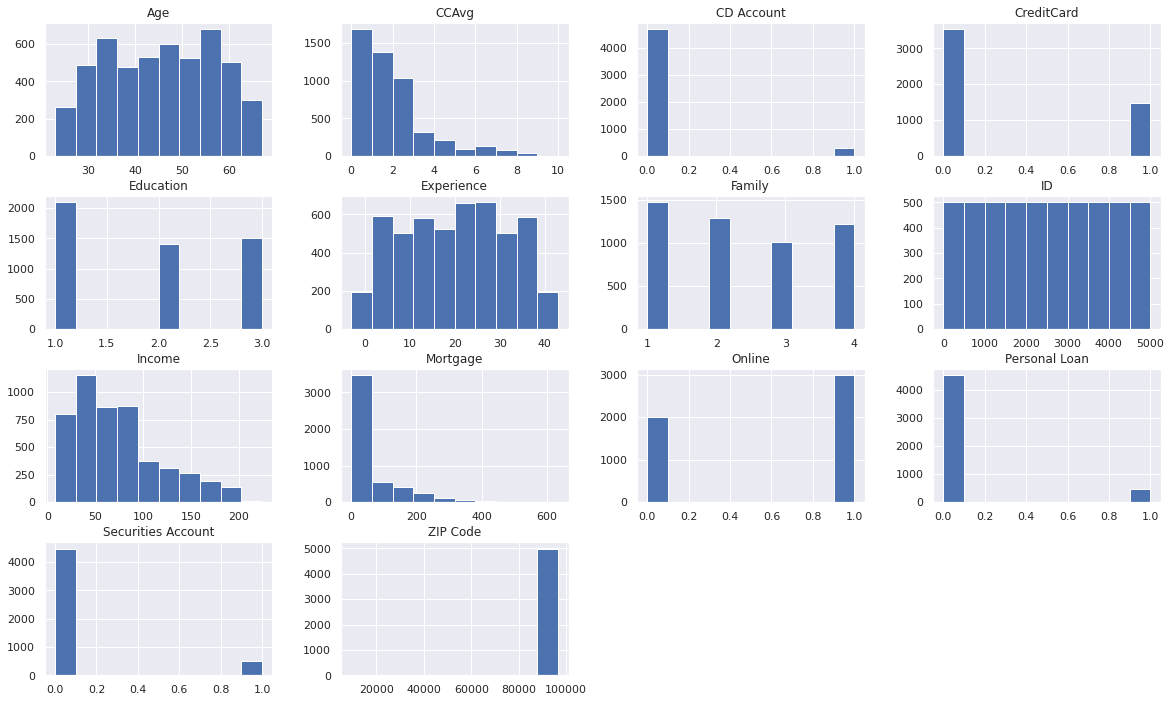

In [11]:
data.hist(figsize=(20, 12))
plt.show()

In [12]:
data.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

/home/abhishek/Workspace/Python/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/abhishek/Workspace/Python/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/abhishek/Workspace/Python/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


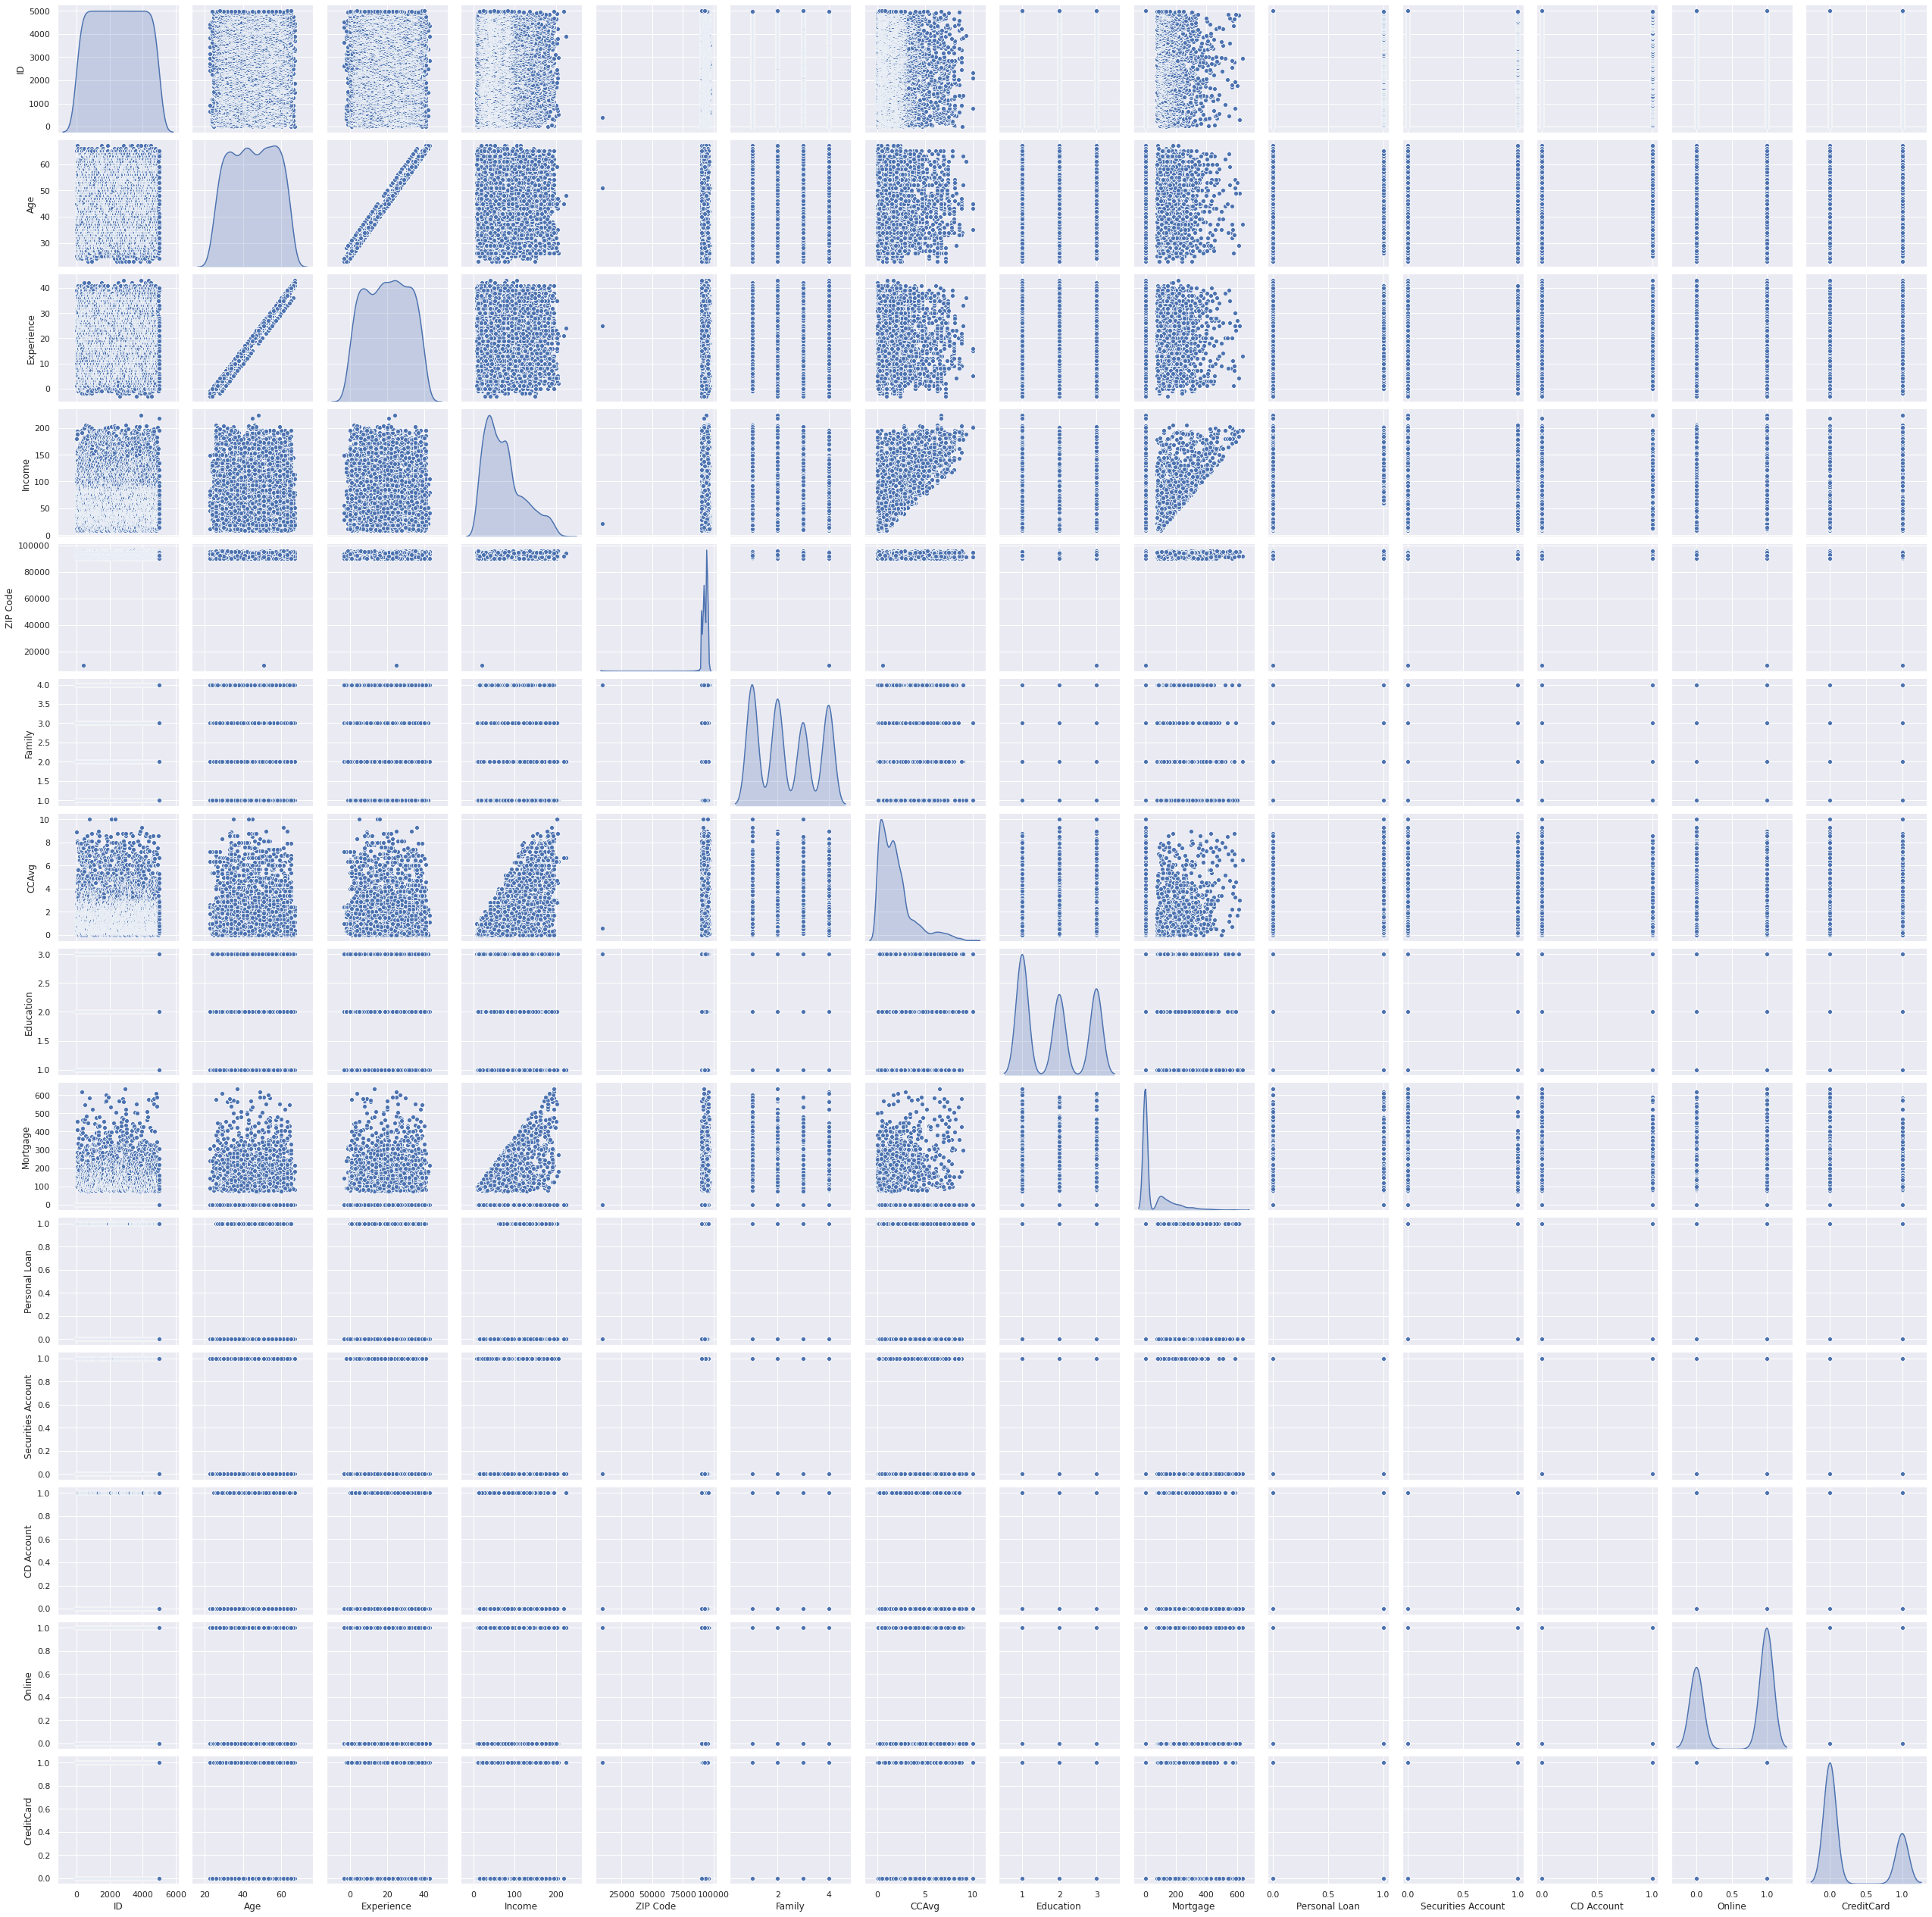

In [13]:
sns.pairplot(data, diag_kind='kde')
plt.show()

### Observations:
1. ID as not giving any information as we previously concluded.
2. Experience is normally distributed with more customer having experience starting from 8 years.
3. Income is positively skewed. Also linear relationship can be seen with the Age which generally always the case as Age increases, experience also increases.
4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
5. It can be observed that CCAvg spend and Mortgage value increases as Income increases.
6. The variables family and education are ordinal variables. The distribution of families is evenly distributed.

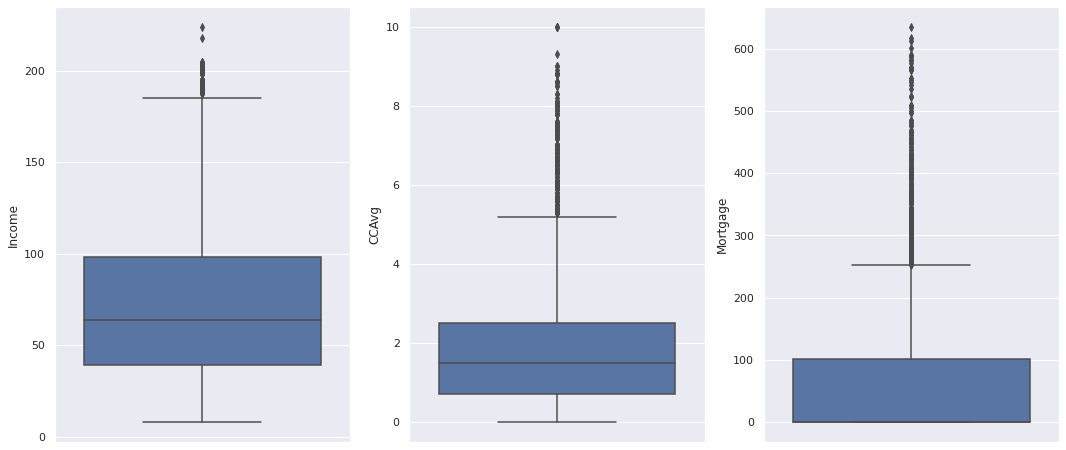

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (18, 8))
sns.boxplot(y='Income', data=data, ax=axes[0])
sns.boxplot(y='CCAvg', data=data, ax=axes[1])
sns.boxplot(y='Mortgage', data=data, ax=axes[2])
plt.show()

### Observations:
1. There are few outliers present in the Income column.
2. There are quite high number of outliers present in CCAvg column.
3. There are very high number of outliers present in Mortgage column.

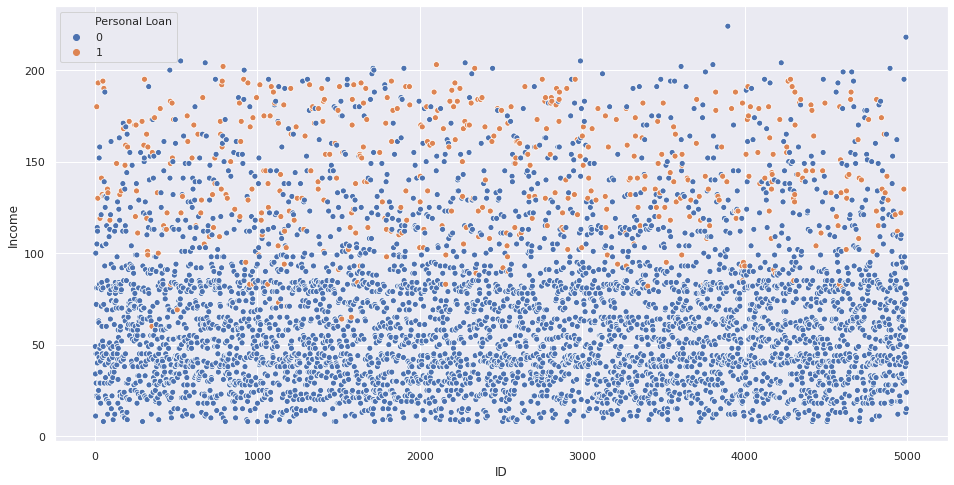

In [15]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='ID', y='Income', data=data, hue='Personal Loan')
plt.show()

### Observations:
1. It can be observed that number of customers who accepted the personal loan offer generally have higher income as well.

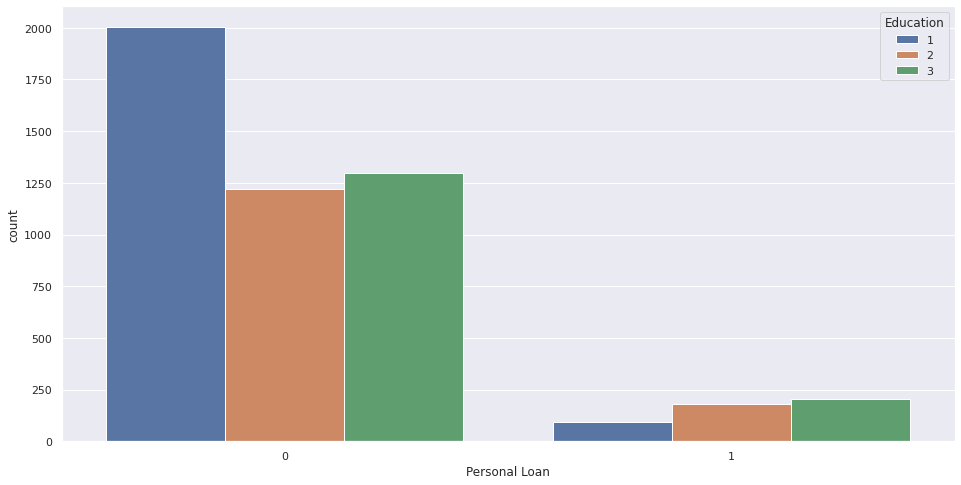

In [16]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Personal Loan', data=data, hue='Education')
plt.show()

### Observations:
1. It can be observed that the customers who accepeted the personal loan offer have Advanced/Professional education.
2. Most of the customers who did not accepted the offer have undergraduate education.

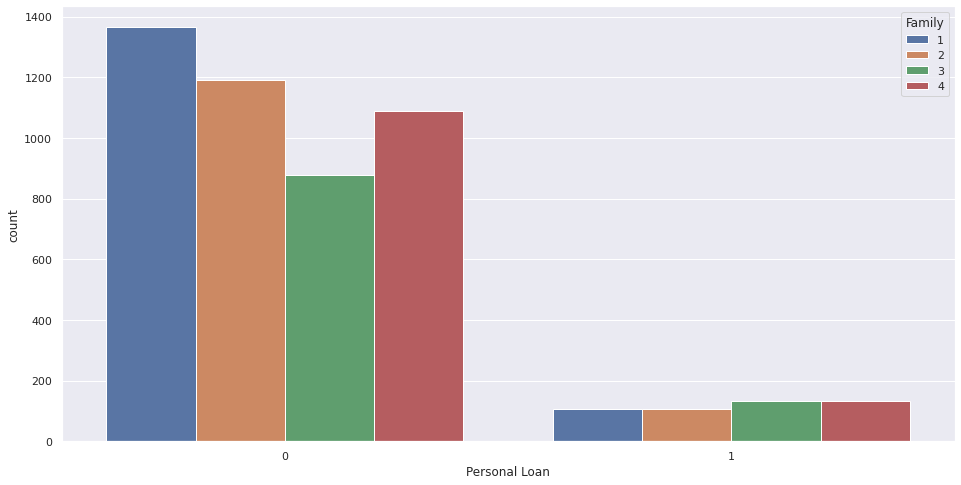

In [17]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Personal Loan', data=data, hue='Family')
plt.show()

### Observations:
1. Nothing can be concluded significantly by seeing the plot. But it can be seen customers having more family members accepted the personal loan offer while more number of customers alone as family member did not accepted the offer.

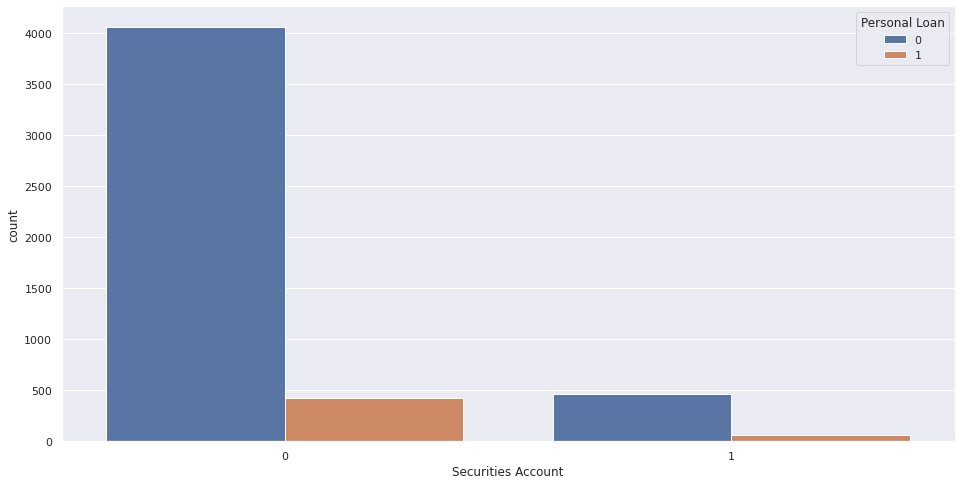

In [18]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Securities Account', data=data, hue='Personal Loan')
plt.show()

### Observations:
1. It can be observed majority of customers who do not accepted the personal loan offer also do not have Securities Account.
2. The customers who are having Securities account also have not accepted the personal loan offer.

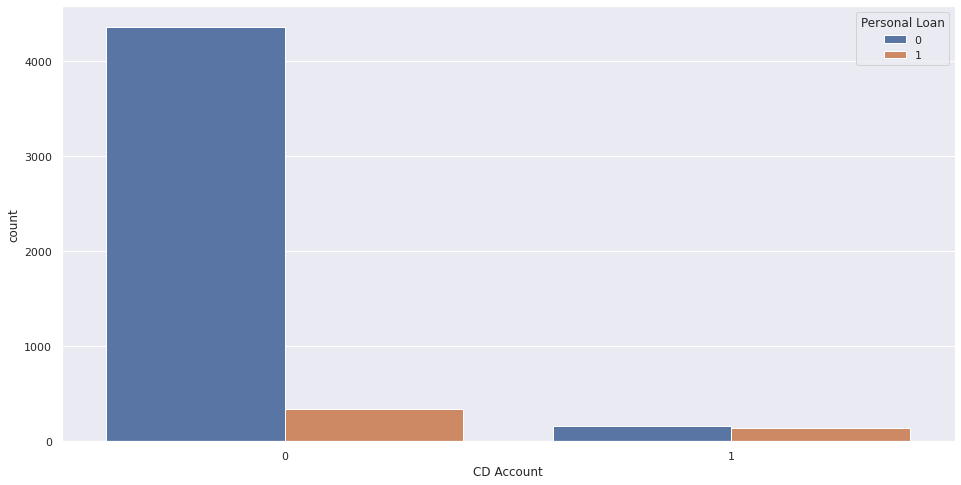

In [19]:
plt.figure(figsize=(16, 8))
sns.countplot(x='CD Account', data=data, hue='Personal Loan')
plt.show()

### Observations:
1. It can be observed majority of customers who do not accepted the personal loan offer also do not have CD Account.
2. Most of the customers who are having CD account have accepted the personal loan offer.

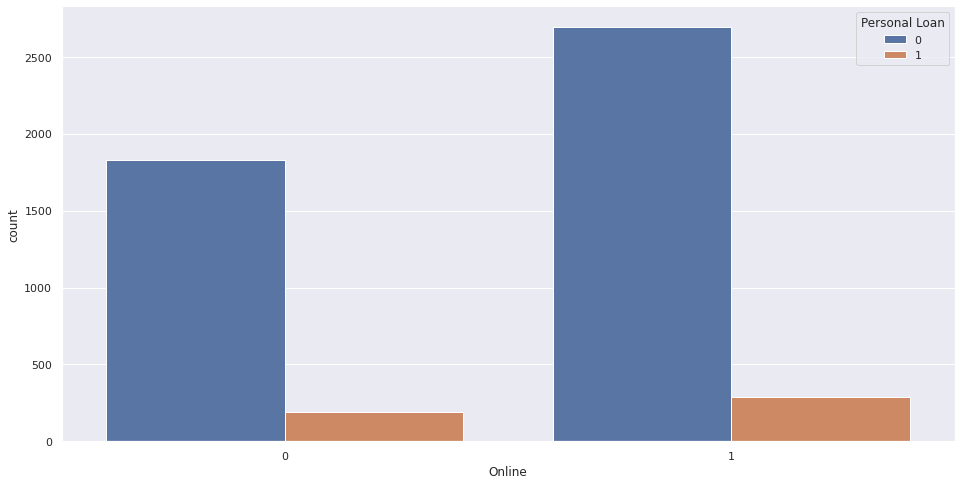

In [20]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Online', data=data, hue='Personal Loan')
plt.show()

### Observations:
1. It can be observed majority of customers who do not accepted the personal loan offer also do not use online banking.
2. The customers who uses online banking also have not accepted the personal loan offer.

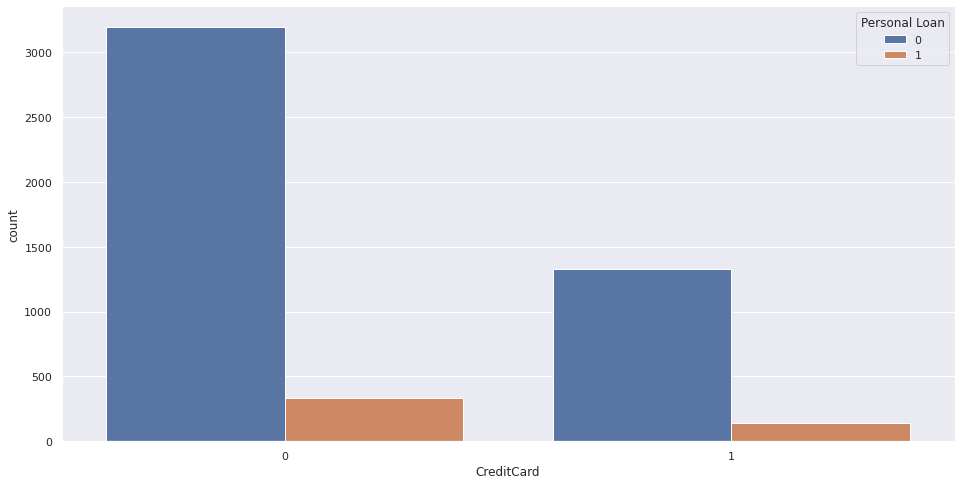

In [21]:
plt.figure(figsize=(16, 8))
sns.countplot(x='CreditCard', data=data, hue='Personal Loan')
plt.show()

### Observations:
1. It can be observed majority of customers who do not accepted the personal loan offer also do not use credit card.
2. Even the customers who uses credit card also have not accepted the personal loan offer.

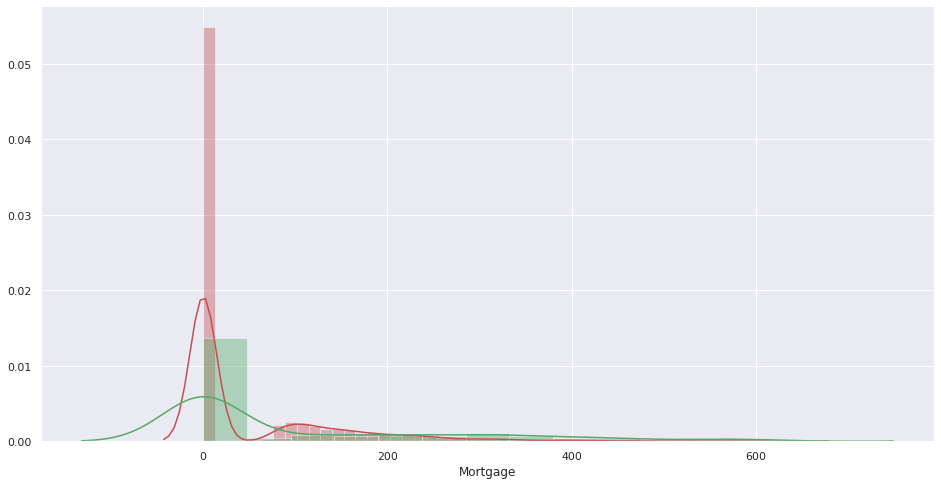

In [22]:
plt.figure(figsize=(16, 8))
sns.distplot(data[data['Personal Loan'] == 0]['Mortgage'], color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['Mortgage'], color = 'g')
plt.show()

### Observations:
1. Nothing significant can be concluded by plotting Mortgage value between customers who accepted Personal Loan offer and who did not.

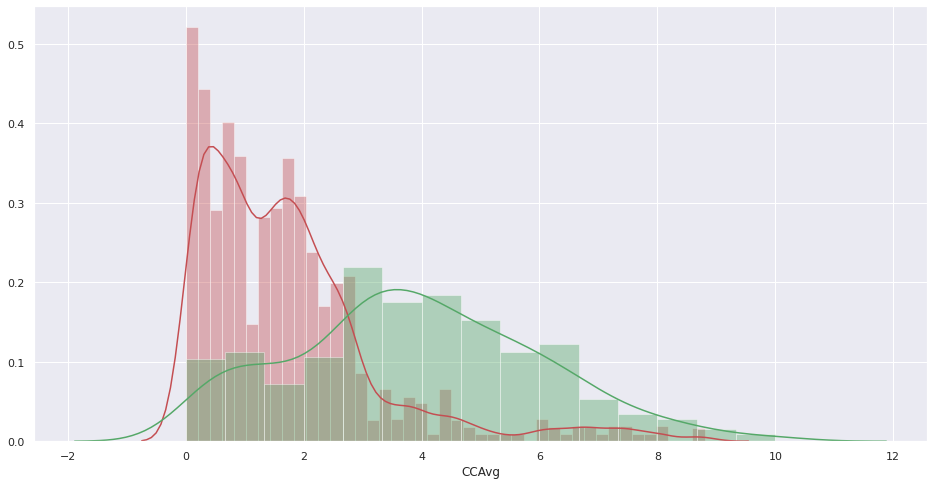

In [23]:
plt.figure(figsize=(16, 8))
sns.distplot(data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['CCAvg'], color = 'g')
plt.show()

### Observations:
1. It can be observerd that the customers who accepted personal loan offer have higher CCAvg than those who did not accepted.

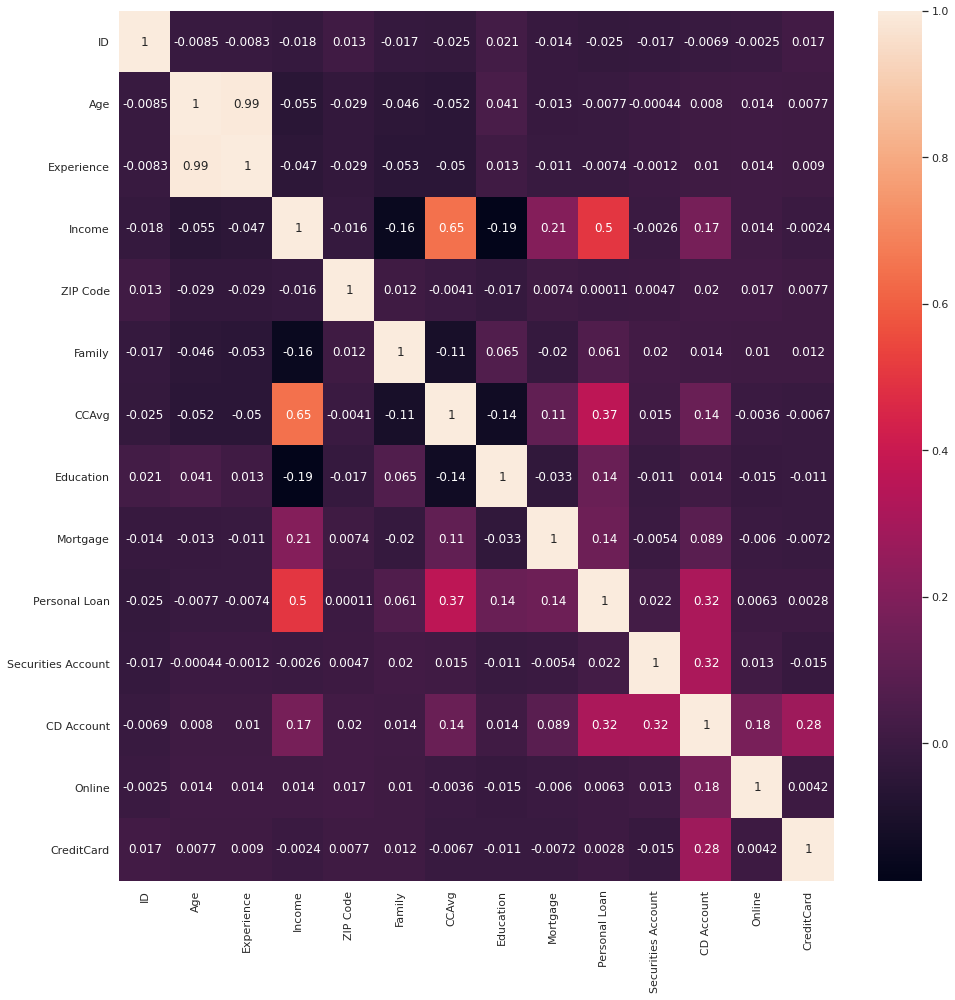

In [24]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True)
plt.show()

___
### Observations:
1. We an observe the maximum correlation between age and experience. Hence, we will dropping either one of the column.
2. We can observe correlation between CCAvg and Income as those who have high income prefer to use Credit Card more.
3. Also, relationship can be observed between Income and Personal Loan which does make sense and higher income customers will prefer Personal Loan.
4. Among other columns, there is not much significance correlation can be observed.

In [25]:
# Handing negative values for Experience
data[data['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


___
### Observtions:
1. There are 52 records present in the dataset having negative Experience.
2. For negative experience values, we can observe the Age ranges from 23 to 29 having the almost same mean and 50% value.
3. For Income as well mean and 50% there is not much big difference.
4. Hence we will be using absolute for the same as there are very less records also -3 is lowest values which will become 3 and considering the age range factor it can be considerable value. 

In [26]:
data['Experience'] = abs(data['Experience'])

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


___ 
### Observations:
1. After changing the Experience value, it can be observed there is no impact in the mean value and 50% compared to previous values.

In [28]:
# Dropping target column and irrelevant columns
X = data.drop(['ID', 'Age', 'Personal Loan'], axis=1)

In [29]:
# Target column
y = data['Personal Loan']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [31]:
# Scaling of the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Logistic Regression

In [32]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_scaled, y_train)
lr_pred_ = lr.predict(X_test_scaled)

In [33]:
lr_train_score = lr.score(X_train_scaled, y_train)
lr_test_score = lr.score(X_test_scaled, y_test)
print('Training Accuracy: {} and Testing Accuracy: {}'.format(lr_train_score, lr_test_score))

Training Accuracy: 0.9525714285714286 and Testing Accuracy: 0.9513333333333334


In [34]:
lr_train_score = lr.score(X_train_scaled, y_train)
lr_test_score = lr.score(X_test_scaled, y_test)
print('Training Accuracy: {} and Testing Accuracy: {}'.format(lr_train_score, lr_test_score))

Training Accuracy: 0.9525714285714286 and Testing Accuracy: 0.9513333333333334


In [35]:
print(metrics.confusion_matrix(y_test, lr_pred_))

[[1324   19]
 [  54  103]]


In [36]:
print(metrics.classification_report(y_test, lr_pred_))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.84      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



### Observations:
1. We got good test accuracy just above 95%.
2. As observed in confusion matrix, there are 102 correct prediction for who accepted the offer while 55 got misclassified. But only 19 prediction got misclassified in case of those who not accepted the offer.
3. In classification report, it can be observed that we got good precision, recall and f1-score for 0 (Not accepted presonal loan) than 1 (accepted personal loan). This is due to imbalance dataset but this can be observed in real life as well.

## K-Nearest Neighbor

In [37]:
# Find the best k value
acc = pd.DataFrame(columns=('k', 'score'))
for i in range(1, 25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    acc.loc[i-1] = [i, score]

In [38]:
acc.sort_values(by='score', ascending=False)

,k,score
4,5.0,0.953333
2,3.0,0.952667
6,7.0,0.952000
0,1.0,0.951333
7,8.0,0.947333
8,9.0,0.947333
3,4.0,0.946667
5,6.0,0.946667
10,11.0,0.946000
1,2.0,0.944667


### Observations:
1. k=5 giving the best accuracy, hence we will choose k value as 5.

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred_ = knn.predict(X_test_scaled)

In [40]:
knn_train_score = knn.score(X_train_scaled, y_train)
knn_test_score = knn.score(X_test_scaled, y_test)
print('Training Accuracy: {} and Testing Accuracy: {}'.format(knn_train_score, knn_test_score))

Training Accuracy: 0.9688571428571429 and Testing Accuracy: 0.9533333333333334


In [41]:
knn_train_score = knn.score(X_train_scaled, y_train)
knn_test_score = knn.score(X_test_scaled, y_test)
print('Training Accuracy: {} and Testing Accuracy: {}'.format(knn_train_score, knn_test_score))

Training Accuracy: 0.9688571428571429 and Testing Accuracy: 0.9533333333333334


In [42]:
print(metrics.confusion_matrix(y_test, knn_pred_))

[[1335    8]
 [  62   95]]


In [43]:
print(metrics.classification_report(y_test, knn_pred_))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.92      0.61      0.73       157

    accuracy                           0.95      1500
   macro avg       0.94      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



### Observations:
1. We got good test accuracy of 95.5% and train accuracy above 97%.
2. As observed in confusion matrix, there are 101 correct prediction for who accepted the offer while 56 got misclassified. But only 11 prediction got misclassified in case of those who not accepted the offer.
3. In classification report, it can be observed that we got good precision, recall and f1-score for 0 (Not accepted presonal loan) than 1 (accepted personal loan). This is due to imbalance dataset but this can be observed in real life as well.

## Naive Bayes

In [44]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred_ = nb.predict(X_test_scaled)

In [45]:
nb_train_score = nb.score(X_train_scaled, y_train)
nb_test_score = nb.score(X_test_scaled, y_test)
print('Training Accuracy: {} and Testing Accuracy: {}'.format(nb_train_score, nb_test_score))

Training Accuracy: 0.8811428571428571 and Testing Accuracy: 0.8913333333333333


In [46]:
print(metrics.confusion_matrix(y_test, nb_pred_))

[[1244   99]
 [  64   93]]


In [47]:
print(metrics.classification_report(y_test, nb_pred_))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.48      0.59      0.53       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



### Observations:
1. We got test accuracy of 89.1% and train accuracy of 88.1%.
2. As observed in confusion matrix, there are 94 correct prediction for who accepted the offer while 63 got misclassified.
3. In classification report, it can be observed that we got good precision, recall and f1-score for 0 (Not accepted presonal loan) than 1 (accepted personal loan). This is due to imbalance dataset but this can be observed in real life as well.

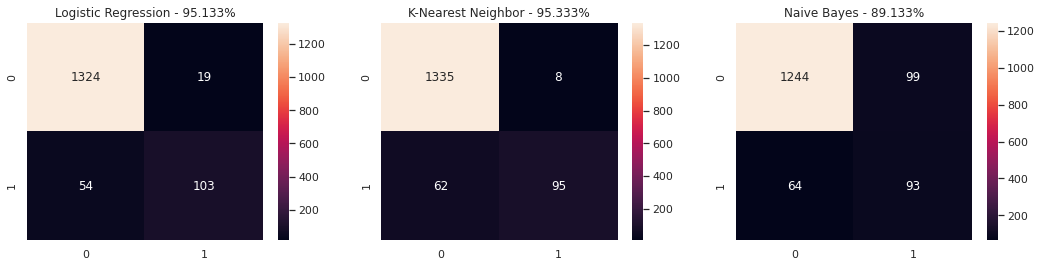

In [48]:
fig, axes = plt.subplots(1, 3, figsize = (18, 4))
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred_), annot=True, fmt='g', ax=axes[0])
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred_), annot=True, fmt='g', ax=axes[1])
sns.heatmap(metrics.confusion_matrix(y_test, nb_pred_), annot=True, fmt='g', ax=axes[2])
axes[0].set(title='Logistic Regression - {}%'.format(round(lr_test_score * 100, 3)))
axes[1].set(title='K-Nearest Neighbor - {}%'.format(round(knn_test_score * 100, 3)))
axes[2].set(title='Naive Bayes - {}%'.format(round(nb_test_score * 100, 3)))
plt.show()

### Observations
1. KNN has having the highest test accuracy i.e. 95.533% than Logistic Regression(95.067%) and Naive Bayes(89.133%) model.
2. In confusion matrix, Logistic Regression mdoel is performing better for predicting customers who accepted the offer while KNN model is performing much better but KNN is performing more better in customers who not accepted the offer.
3. Naive Bayes is performing poorly in both cases while it can be seen that prediction of customer not accepted the offer is highly misclassified with compare to other models.

### Conclusion:
1. As it can be seen for this dataset, the best model will be <b>KNN</b>.
2. Comparing with Logistic Regression models, KNN is giving better accuracy and precision and f1 score for both the classes.
3. But KNN models are lazy learner and takes time for computation.
4. In terms of scalability, the preferable choice will be Logistic Regression model.